In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import re

start_year = 1960
end_year = 2021

# define a new df to which you will write the new data
summary_table = pd.DataFrame(columns=['year', 'unique_artist_count', 'artists_with_1_hit',
                                      'artists_with_2_hits', 'artists_with_3_hits', 'artists_with_4_hits', 'artists_with_5_hits'])

for year in range(start_year, end_year):

    # read the file that hold the info
    df = pd.read_csv(f'./data/billboard_top_100_{year}.csv')
    print(year)

    # get the column that holds artist name
    artist_names = df['Artist(s)']
    # define an empty dataframe which will be used to append seperated artist-names
    artist_name_column = 'artist_name'
    seperated_artist_names = pd.DataFrame(columns=[artist_name_column])

    for artist_name in artist_names:

        # some regex magic to split the cell that holds multiple artists
        delimiters = " featuring ", " and "
        regexPattern = '|'.join(map(re.escape, delimiters))
        split_artists = re.split(regexPattern, artist_name)

        for a in split_artists:

            # thing that will be inserted into the dataframe
            data = {artist_name_column: a}

            seperated_artist_names = seperated_artist_names.append(data, ignore_index=True)

    # seperated_artist_names                            <- table of artists
    # seperated_artist_names.apply(pd.value_counts)     <- returns the name and how many times it was mentioned

    # number of unique mentions of an artist
    song_count_table = seperated_artist_names.apply(pd.value_counts)

    # number of artists, not repeating
    unique_artist_count = song_count_table.shape[0]
    
    # number of x hits
    artists_with_1_hit = song_count_table[song_count_table['artist_name'] == 1].shape[0]
    artists_with_2_hits = song_count_table[song_count_table['artist_name'] == 2].shape[0]
    artists_with_3_hits = song_count_table[song_count_table['artist_name'] == 3].shape[0]
    artists_with_4_hits = song_count_table[song_count_table['artist_name'] == 4].shape[0]
    artists_with_5_hits = song_count_table[song_count_table['artist_name'] == 5].shape[0]

    # object that is appended to the summary_table dataframe
    year_summary = {
        'year': year,
        'unique_artist_count': unique_artist_count,
        'artists_with_1_hit':  artists_with_1_hit,
        'artists_with_2_hits': artists_with_2_hits,
        'artists_with_3_hits': artists_with_3_hits,
        'artists_with_4_hits': artists_with_4_hits,
        'artists_with_5_hits': artists_with_5_hits
    }

    # append each year to the main table
    summary_table = summary_table.append(year_summary, ignore_index=True)
    # summary_table.to_csv('one_hit_wonder_summary.csv')

summary_table.to_csv('one_hit_wonder_summary.csv')


1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


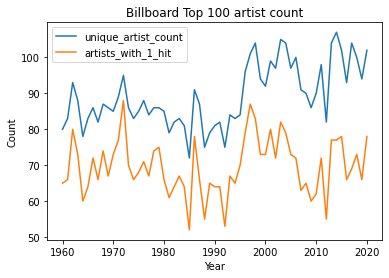

In [7]:
df = pd.read_csv('./one_hit_wonder_summary.csv')

# adds white col to the backgound, so that wouldn't be transparent
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

# plt the lines
plt.plot(df['year'], df['unique_artist_count'], label="unique_artist_count")
plt.plot(df['year'], df['artists_with_1_hit'], label="artists_with_1_hit")

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Billboard Top 100 artist count')

plt.legend()
plt.savefig('billboard_top_100_artist_count.png', transparent=False)


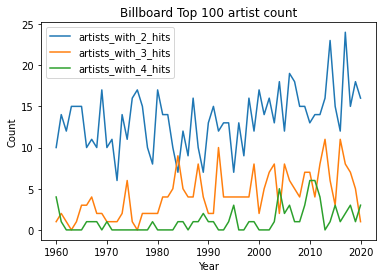

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

plt.plot(df['year'], df['artists_with_2_hits'], label="artists_with_2_hits")
plt.plot(df['year'], df['artists_with_3_hits'], label="artists_with_3_hits")
plt.plot(df['year'], df['artists_with_4_hits'], label="artists_with_4_hits")

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Billboard Top 100 artist count')

plt.legend()
plt.savefig('billboard_top_100_artist_top_hit_count.png', transparent=False)